IMPORTING THE REQUIRED 

In [29]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [30]:
import keras 

LOADING AND SPLITTING THE DATA 

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [32]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [33]:
print(X_train[0].shape)

(32, 32, 3)


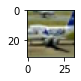

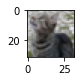

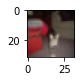

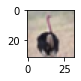

In [34]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [35]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [36]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 476s 1s/step - loss: 1.8294 - accuracy: 0.3207 - val_loss: 1.1158 - val_accuracy: 0.6010
Epoch 2/10
391/391 [==============================] - 476s 1s/step - loss: 1.1247 - accuracy: 0.5964 - val_loss: 0.8967 - val_accuracy: 0.6863
Epoch 3/10
391/391 [==============================] - 476s 1s/step - loss: 0.8993 - accuracy: 0.6866 - val_loss: 0.8108 - val_accuracy: 0.7123
Epoch 4/10
391/391 [==============================] - 476s 1s/step - loss: 0.7936 - accuracy: 0.7232 - val_loss: 0.7089 - val_accuracy: 0.7531
Epoch 5/10
391/391 [==============================] - 478s 1s/step - loss: 0.6896 - accuracy: 0.7591 - val_loss: 0.6788 - val_accuracy: 0.7607
Epoch 6/10
391/391 [==============================] - 474s 1s/step - loss: 0.6086 - accuracy: 0.7887 - val_loss: 0.6670 - val_accuracy: 0.7720
Epoch 7/10
391/391 [==============================] - 476s 1s/step - loss: 0.5639 - accuracy: 0.8015 - val_loss: 0.6539 - val_accuracy: 0.7720

PREDICTING 

In [38]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 36ms/step


In [39]:
print (predictions)

[[1.52127133e-04 1.31934785e-05 3.91519144e-02 3.35293114e-02
  8.33443344e-01 4.37791422e-02 1.59000524e-03 4.81766276e-02
  5.72051285e-05 1.07263608e-04]
 [1.02839120e-04 3.76994249e-05 4.00168933e-02 1.33544147e-01
  7.18595237e-02 5.67784846e-01 1.57534163e-02 1.70481503e-01
  4.89746817e-05 3.70116148e-04]
 [6.45429873e-06 4.77969206e-06 5.26933512e-03 1.47040805e-03
  1.63557619e-04 4.22144425e-04 9.92623448e-01 3.60593513e-05
  8.95452047e-07 2.92554819e-06]
 [2.19043636e-06 2.26327461e-06 1.00176665e-03 8.96046698e-01
  4.51277010e-03 4.80583124e-02 5.02298698e-02 1.33608119e-04
  1.71391707e-06 1.09137400e-05]
 [8.64958605e-10 9.99994278e-01 7.93239367e-16 3.60679097e-14
  2.93616175e-18 5.69321178e-16 9.92322645e-15 3.63705402e-15
  2.33793873e-08 5.69261601e-06]
 [2.78202265e-07 9.99853015e-01 5.02389901e-11 7.81551546e-10
  4.68261226e-14 3.74154319e-11 1.31980690e-10 3.71448342e-13
  9.21415995e-05 5.45973526e-05]
 [8.75668228e-02 2.23544310e-04 4.50315587e-02 5.54041326e

In [40]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0
1.0000001
1.0
1.0
1.0
1.0000001
1.0


In [41]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION 

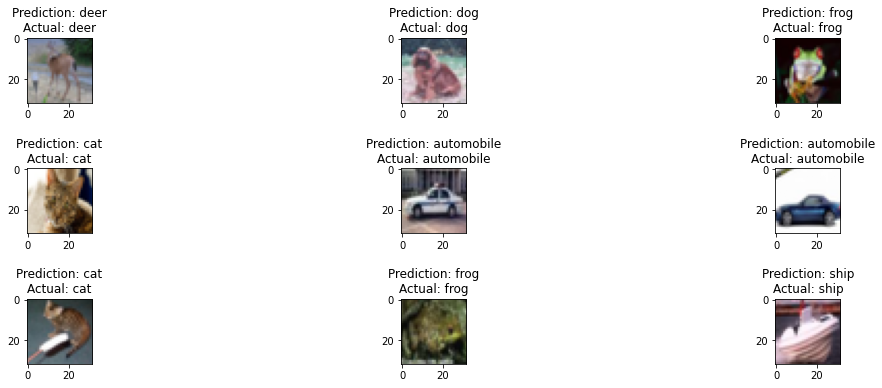

In [43]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()